<a href="https://colab.research.google.com/github/Harshitmaury123/Machine_Learning_Lab/blob/main/gradient_descent_final_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.zeros(n)
    b = 0
    costs = []

    for i in range(epochs):
        y_pred = np.dot(X, W) + b
        error = y_pred - y

        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        W -= lr * dW
        b -= lr * db

        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)
    return W, b, costs


# Momentum GD
def momentum_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    m, n = X.shape
    W = np.zeros(n)
    b = 0
    vW, vb = np.zeros(n), 0
    costs = []

    for i in range(epochs):
        y_pred = np.dot(X, W) + b
        error = y_pred - y

        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        vW = gamma * vW + lr * dW
        vb = gamma * vb + lr * db

        W -= vW
        b -= vb

        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)
    return W, b, costs


# Nesterov Accelerated GD
def nesterov_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    m, n = X.shape
    W = np.zeros(n)
    b = 0
    vW, vb = np.zeros(n), 0
    costs = []

    for i in range(epochs):
        # Look ahead
        W_lookahead = W - gamma * vW
        b_lookahead = b - gamma * vb

        y_pred = np.dot(X, W_lookahead) + b_lookahead
        error = y_pred - y

        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        vW = gamma * vW + lr * dW
        vb = gamma * vb + lr * db

        W -= vW
        b -= vb

        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)
    return W, b, costs


In [6]:
def compare_optimizers(X, y, lr=0.01, epochs=200):
    W_gd, b_gd, costs_gd = gradient_descent(X, y, lr, epochs)
    W_mom, b_mom, costs_mom = momentum_gd(X, y, lr, epochs)
    W_nag, b_nag, costs_nag = nesterov_gd(X, y, lr, epochs)

    plt.figure(figsize=(8,5))
    plt.plot(costs_gd, label="Gradient Descent")
    plt.plot(costs_mom, label="Momentum GD")
    plt.plot(costs_nag, label="Nesterov GD")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.legend()
    plt.title("Optimizer Comparison")
    plt.show()

    return (W_gd, b_gd), (W_mom, b_mom), (W_nag, b_nag)


In [7]:
def run_on_dataset(path, target):
    df = pd.read_csv(path)

    # Encode categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    X = df.drop(columns=[target]).values
    y = df[target].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print(f"Running on dataset: {path}, target: {target}")
    compare_optimizers(X, y, lr=0.01, epochs=300)


Running on dataset: advertising.csv, target: Sales


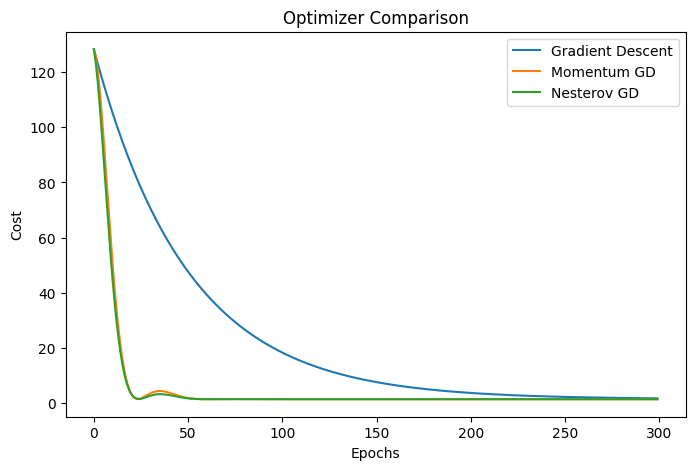

Running on dataset: Housing.csv, target: price


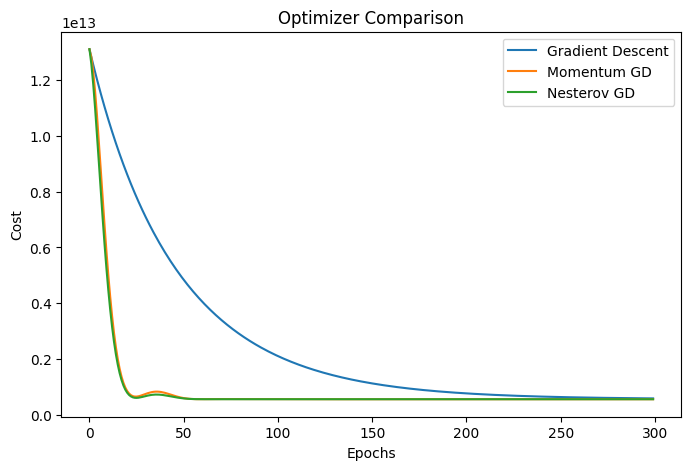

In [8]:
# Advertising dataset
run_on_dataset("advertising.csv", "Sales")

run_on_dataset("Housing.csv", "price")

